In [5]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../..')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('tas.csv',sep ='\t')
df

,Question,Clear marks,Obtain marks,Time,Test_result
0,10,7,10,10,1
1,10,7,10,9,1
2,10,7,10,8,1
3,10,7,10,7,1
4,10,7,10,6,2
...,...,...,...,...,...
75,10,7,1,7,0
76,10,7,1,6,0
77,10,7,1,5,0
78,10,7,1,4,0


In [10]:
train_data = df.sample(frac = 0.8)
train_data

,Question,Clear marks,Obtain marks,Time,Test_result
6,10,7,10,4,2
74,10,7,1,8,0
19,10,7,8,7,1
25,10,7,7,9,1
76,10,7,1,6,0
...,...,...,...,...,...
58,10,7,3,8,0
2,10,7,10,8,1
43,10,7,5,7,0
61,10,7,3,5,0


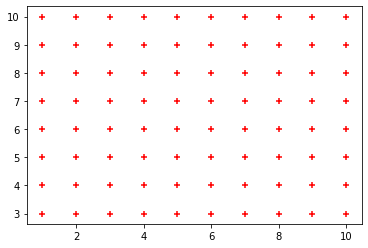

In [11]:
from homemade.logistic_regression import LogisticRegression
plt.scatter(df['Obtain marks'],df.Time,marker='+',color='red')

In [12]:
test_data = df.drop(train_data.index)
test_data

,Question,Clear marks,Obtain marks,Time,Test_result
4,10,7,10,6,2
9,10,7,9,9,1
11,10,7,9,7,1
27,10,7,7,7,1
29,10,7,7,5,2
35,10,7,6,7,0
40,10,7,5,10,0
42,10,7,5,8,0
44,10,7,5,6,0
51,10,7,4,7,0


In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df[['Obtain marks','Time']],df['Test_result'],train_size=0.9)

In [16]:
X_test

,Obtain marks,Time
44,5,6
62,3,4
17,8,9
25,7,9
10,9,8
11,9,7
38,6,4
7,10,3


In [17]:
model.fit(X_train, y_train)

C:\Users\92341\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\92341\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
X_test

,Obtain marks,Time
44,5,6
62,3,4
17,8,9
25,7,9
10,9,8
11,9,7
38,6,4
7,10,3


In [19]:
y_predicted = model.predict(X_test)

In [20]:
model.predict_proba(X_test)

array([[0.77608045, 0.19010636, 0.03381319],
       [0.84591012, 0.10105   , 0.05303988],
       [0.52516232, 0.45728459, 0.01755309],
       [0.6751225 , 0.31951677, 0.00536072],
       [0.22033024, 0.59826666, 0.18140309],
       [0.11860999, 0.468982  , 0.41240801],
       [0.27486531, 0.18922804, 0.53590665],
       [0.00451955, 0.26175743, 0.73372302]])

In [21]:
model.score(X_test,y_test)


0.625

In [22]:
model.predict(X_train)

array([0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 1,
       0, 0, 0, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 2, 1, 0,
       1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 1], dtype=int64)

In [23]:
model.predict(X_test)

array([0, 0, 0, 0, 1, 1, 2, 2], dtype=int64)

In [24]:
model.score(X_train,y_train)

0.8888888888888888

In [25]:
    model.predict(X_test)

array([0, 0, 0, 0, 1, 1, 2, 2], dtype=int64)

In [32]:
model.predict([[9,8]])

array([1], dtype=int64)

In [27]:
X_test

,Obtain marks,Time
44,5,6
62,3,4
17,8,9
25,7,9
10,9,8
11,9,7
38,6,4
7,10,3
